<a href="https://colab.research.google.com/github/BiswajitAich/FUTURE_ML_01/blob/main/FUTURE_ML_01-Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Goal is to predict future sales or demand based on past data and present the results in a clear, business-friendly way.

# **Introduction**

**Time Series Forecasting**

Time series forecasting occurs when you make scientific predictions based on historical time stamped data. It involves building models through historical analysis and using them to make observations and drive future strategic decision-making. An important distinction in forecasting is that at the time of the work, the future outcome is completely unavailable and can only be estimated through careful analysis and evidence-based priors.

This project builds a machine learning–based sales forecasting system using historical retail transaction data. The objective is to predict future sales trends to assist businesses in inventory planning, staffing decisions, and demand management.

# **Dataset Loading**

## Dataset Overview
The Superstore dataset contains retail transaction records including order dates, product categories, and sales values across different regions in the United States.

For forecasting purposes, individual transactions were aggregated into daily total sales.

In [3]:
import pandas as pd

df = pd.read_csv("hf://datasets/An-j96/SuperstoreData/data.csv")

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Data Preprocessing**

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Order Date')

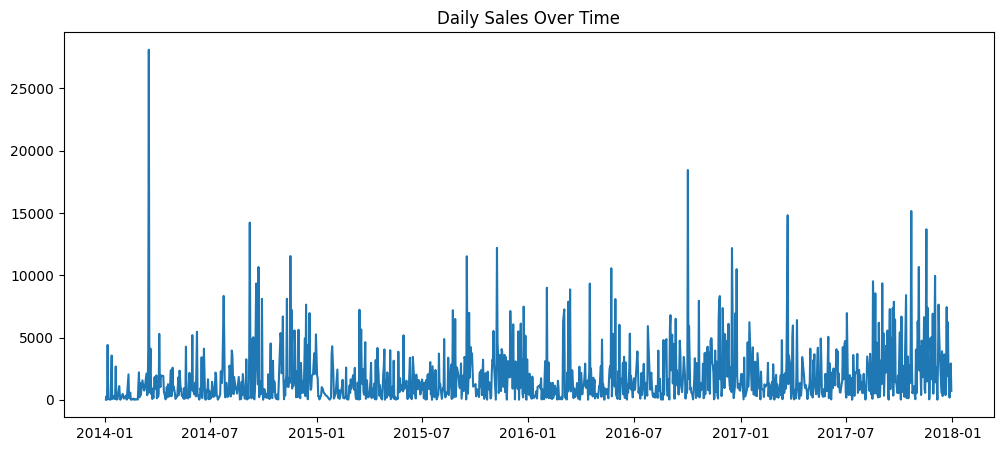

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title("Daily Sales Over Time")
plt.show()

In [16]:
daily_sales['year'] = daily_sales['Order Date'].dt.year
daily_sales['month'] = daily_sales['Order Date'].dt.month
daily_sales['day'] = daily_sales['Order Date'].dt.day
daily_sales['dayofweek'] = daily_sales['Order Date'].dt.dayofweek

daily_sales['lag_1'] = daily_sales['Sales'].shift(1)
daily_sales['lag_7'] = daily_sales['Sales'].shift(7)

daily_sales = daily_sales.dropna()

In [17]:
daily_sales.head()

,Order Date,Sales,year,month,day,dayofweek,lag_1,lag_7
7,2014-01-11,9.940,2014,1,11,5,54.830,16.448
8,2014-01-13,3553.795,2014,1,13,0,9.940,288.060
9,2014-01-14,61.960,2014,1,14,1,3553.795,19.536
10,2014-01-15,149.950,2014,1,15,2,61.960,4407.100
11,2014-01-16,299.964,2014,1,16,3,149.950,87.158


In [18]:
X = daily_sales.drop(columns=['Order Date', 'Sales'])
y = daily_sales['Sales']

In [19]:
split_index = int(len(daily_sales) * 0.8)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

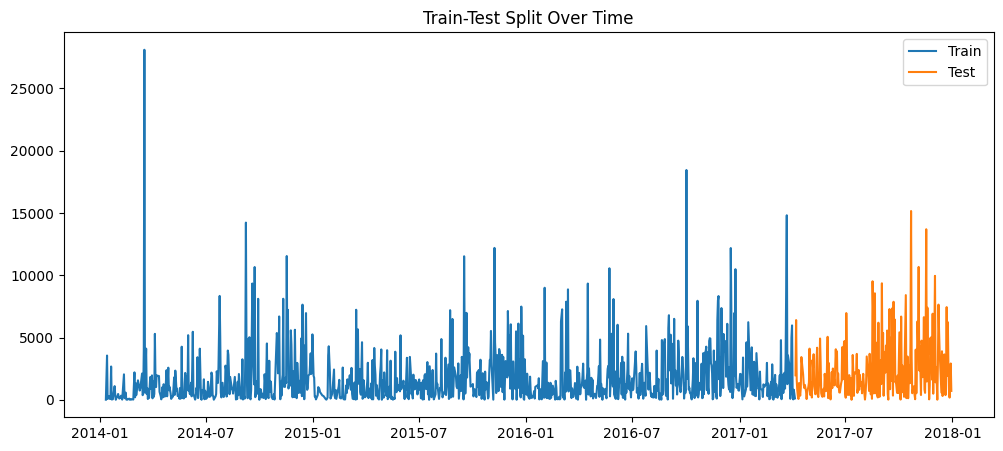

In [33]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales['Order Date'][:split_index], y_train, label="Train")
plt.plot(daily_sales['Order Date'][split_index:], y_test, label="Test")
plt.legend()
plt.title("Train-Test Split Over Time")
plt.show()

# **Model Training**

In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Random Forest Regressor was chosen because it can model non-linear relationships and works well with engineered time features without requiring strict statistical assumptions.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1698.0660559065038
RMSE: 2376.568033450802


MAE represents the average prediction error in sales value.

RMSE penalizes larger prediction errors more heavily.

Lower values indicate better forecasting performance.

# **Model Evaluation**

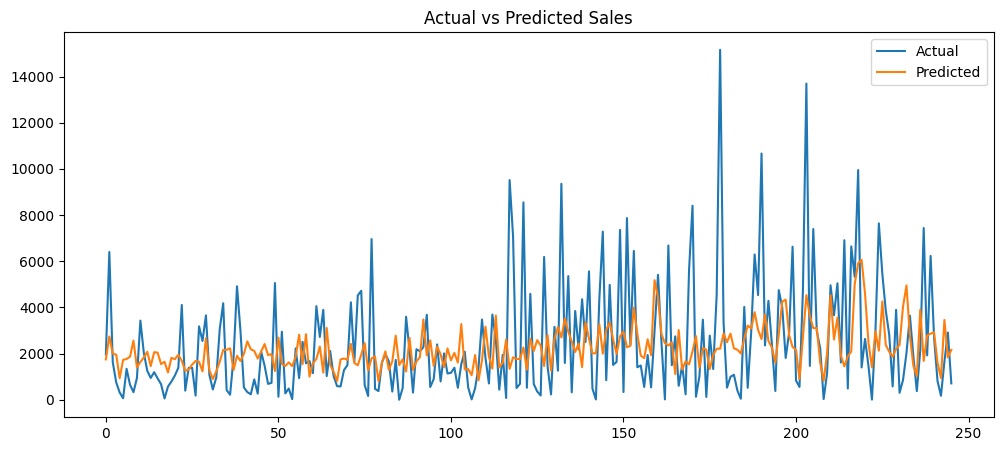

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual")
plt.plot(preds, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()

# **Future Forecasting**

In [23]:
last_date = daily_sales['Order Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=30,
                             freq='D')

In [26]:
history = daily_sales.copy()
future_predictions = []

In [27]:
for date in future_dates:

    new_row = {}

    new_row['Order Date'] = date
    new_row['year'] = date.year
    new_row['month'] = date.month
    new_row['day'] = date.day
    new_row['dayofweek'] = date.dayofweek

    # lag features from history
    new_row['lag_1'] = history['Sales'].iloc[-1]
    new_row['lag_7'] = history['Sales'].iloc[-7]

    X_new = pd.DataFrame([new_row]).drop(columns=['Order Date'])

    pred = model.predict(X_new)[0]

    new_row['Sales'] = pred
    future_predictions.append(new_row)

    history = pd.concat([history, pd.DataFrame([new_row])], ignore_index=True)

# **Visualization**

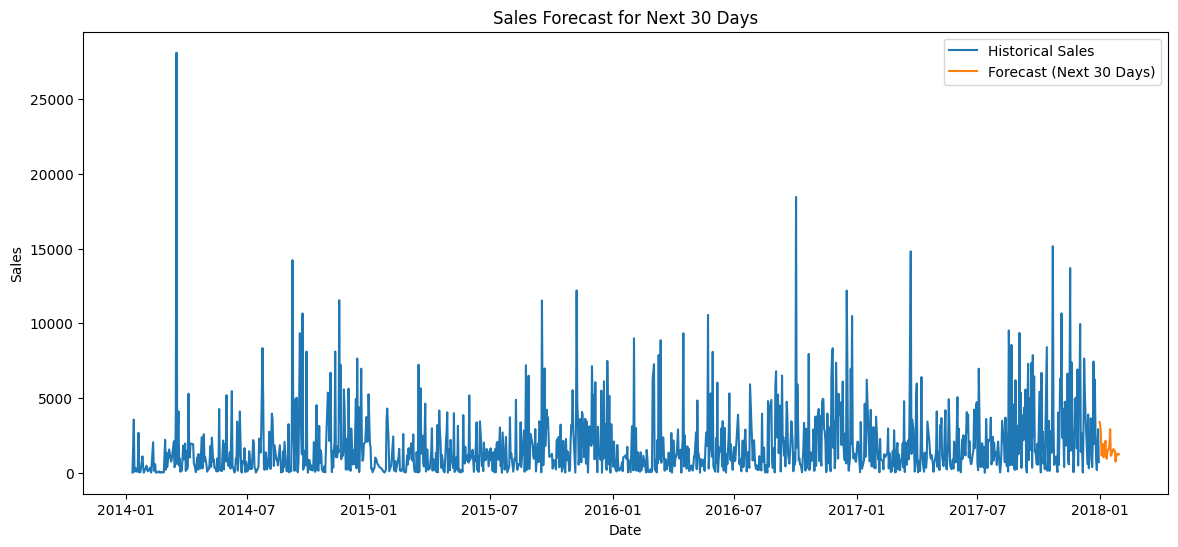

In [28]:
future_df = pd.DataFrame(future_predictions)
plt.figure(figsize=(14,6))

plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label="Historical Sales")
plt.plot(future_df['Order Date'], future_df['Sales'], label="Forecast (Next 30 Days)")

plt.legend()
plt.title("Sales Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.show()

In [29]:
daily_sales['rolling_mean'] = daily_sales['Sales'].rolling(window=30).mean()

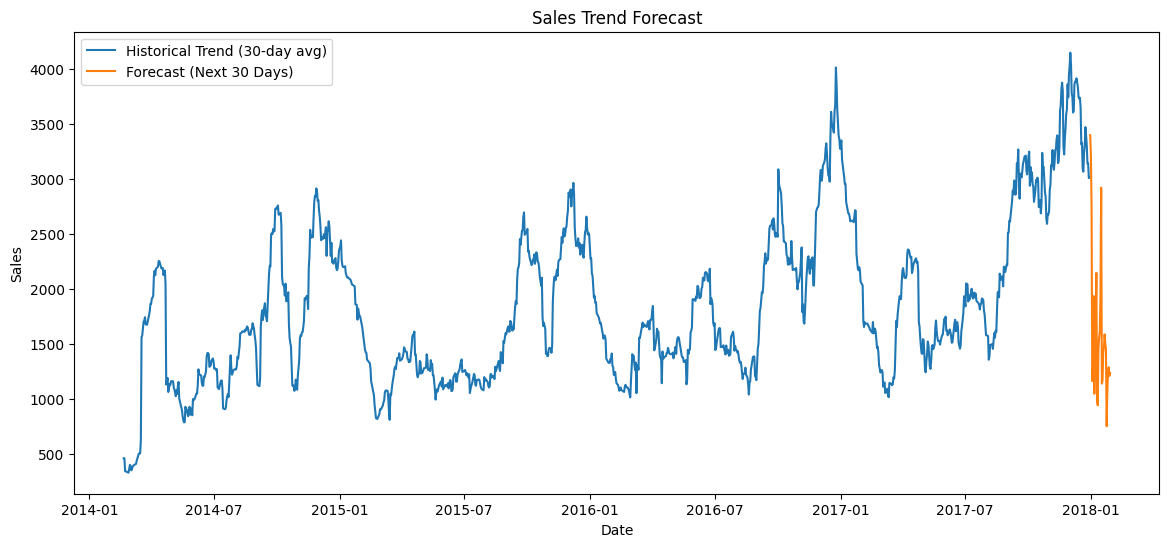

In [30]:
plt.figure(figsize=(14,6))

plt.plot(daily_sales['Order Date'],
         daily_sales['rolling_mean'],
         label="Historical Trend (30-day avg)")

plt.plot(future_df['Order Date'],
         future_df['Sales'],
         label="Forecast (Next 30 Days)")

plt.legend()
plt.title("Sales Trend Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

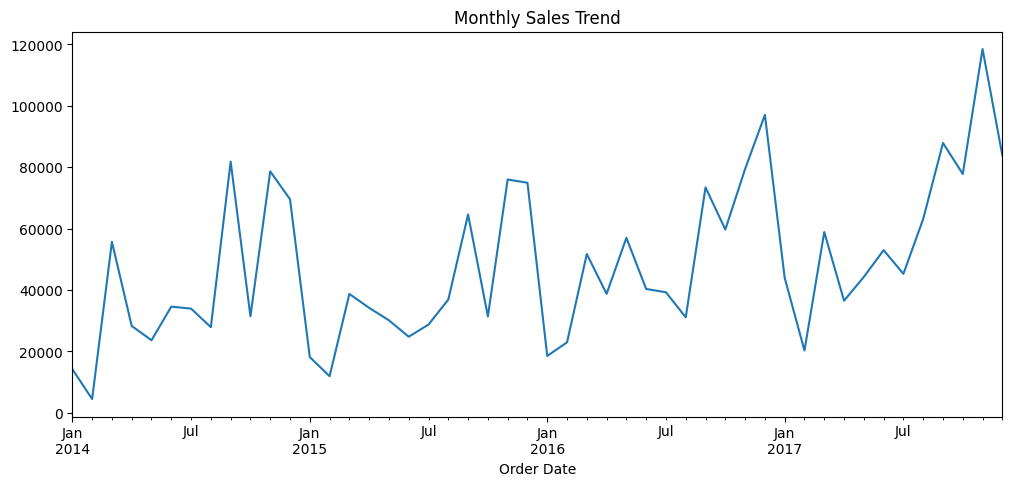

In [32]:
monthly = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()

monthly.plot(figsize=(12,5), title="Monthly Sales Trend")
plt.show()

# **Business Insights**

- Sales show periodic fluctuations indicating weekly demand cycles.

- Forecast suggests stable demand in the upcoming 30 days.

- Businesses should maintain consistent inventory levels.

- Monitoring monthly trends can improve procurement planning.

# **Conclusion**

A machine learning forecasting model was developed using historical retail sales data.
The model captures temporal patterns and predicts expected sales for the next 30 days, helping businesses plan inventory and operations efficiently.

# **References**

1. Dataset - [HuggingFace](https://huggingface.co/datasets/An-j96/SuperstoreData)
2. Coding implementation - [Google Collab](https://colab.research.google.com/)
3. Conceptual guidance and debugging assistance were obtained using AI-assisted development tools.